

# Calcuations of Rapidly varied Flow: Mainly using the  Specific Engery equation

The *Specific Energy* equation take the form
$$E_s = y + \frac{V^2}{2g}$$
Or in $Q$ form
$$E_s = y + \frac{Q^2}{2gA^2}$$
It is usually applied to a square channel (as are all of these examples), so as $A=by$, the above equation becomes
$$E_s = y + \frac{Q^2}{2gb^2y^2}$$
But also analysis (of rectangular channels) often uses the concept of *flow per unit width*, $q$, where
$$q = Q/b$$
or 
$$Q = qb$$
Where $b$ is eh bed width and the surface width in a rectangular channel

So this gives rise to 
$$E_s = y + \frac{q^2}{2gy^2}$$

The specific energy concept is usually applied to situations and lengths of channel, usually when flow converges and thus there is little energy loss i.e. energy is conserved over these short distances. So we say that, between teo points 1 and 2 where energy losses can be ignored
$$E_s_1 = E_s_2$$
and so 
$$y_1 + \frac{V_1^2}{2g} =y_2 + \frac{V_2^2}{2g}$$  
or for a rectangular channel
$$y_1 + \frac{Q^2}{2gb_1^2y_1^2}  = y_2 + \frac{Q^2}{2gb_2^2y_2^2}$$
or
$$y_1 + \frac{q_1^2}{2gy_1^2} = y_2 + \frac{q_2^2}{2gy_2^2}$$

When the channel is not contraction i.e. it is a constant width, then using the fact that $b_1 = b_2 = b$, then this equation simplifies to
$$y_1 + \frac{Q^2}{2gb^2y_1^2}  = y_2 + \frac{Q^2}{2gb^2y_2^2}$$
and
$$y_1 + \frac{q^2}{2gy_1^2} = y_2 + \frac{q^2}{2gy_2^2}$$



## Solution of the *specific energy* equation

Often we will know the discharge (flow) $Q$ and width , so know $q$, and know either $y_1$ or  $y_2$. When this is the case the resulting equation is a*cubic equatioN* in the unknow depth. e.g. if $q$ and $y_1$ are know the equation can be earranged to in the form of a *cubic* in $y_2$:
$$0= y_2^3  + \left(- y_1 - \frac{q^2}{2gy_1^2}\right)y_2^2 + \frac{q^2}{2g}$$
As with all cubics, this equation has three solutions.

The reason for pointing this out is that is to show that it is often necessary to solve a cubic equation when analysing open channel flow using the specifc energy approach.
So it is necessary to know how to solve cubic equations. That is the objecting of the next few cells in this notebook.


Let's first look at an example and look at the magnitude of the *numbers* to help form the solution for a typical channel.

Eg 1.

A steady uniform flow in a rectangular channel of width $b = 5m$ is interrupted by the presence of a bump of $0.2m$ in the channel. The upstream depth is $y_1 = 1.25m$ and the discharge is $Q = 10m^3/s$, find the depth of flow at position 2

We need to just think about the speficic energy equation again to take account of the bump height. Remembering that this equation is based on the *Bernoulli* equation on a flat bed, we can see that we need to add in the height change between point 1 and 2 (or the *potential energy* gain). So between points 1 and 2 we can write 
$$E_s_1 = E_s_2 + \Delta z$$
Where $\Delta z$ is the height of the bump. So $\Delta z = 0.2m$ in this example

For this rectangular channel we can write

$$y_1 + \frac{q_1^2}{2gy_1^2} = y_2 + \frac{q_2^2}{2gy_2^2} + \Delta z$$

And taking into account the known values this can be rearranged into a similar cubic in terms of $y_2$ as shown above
$$0= y_2^3 + \left(\Delta z - y_1 - \frac{q^2}{2gy_1^2} \right )y_2^2 + \frac{q^2}{2g}$$

We can calculate $q = \frac{Q}{b} = \frac{10}{5} = 2.0 (m^3/s)/m$ and conservation of energy becomes (using $g= 9.81 m/s^2$)
$$0= y_2^3 + \left(0.2 - 1.25 - \frac{2.0^2}{2 \times 9.81 \times 1.25^2} \right )y_2^2 + \frac{2.0^2}{2 \times 9.81}$$
Or
$$0= y_2^3 -1.18 y_2^2 + 0.204$$

The subsequent cells will plot this function and show the python code to solve this specific example.


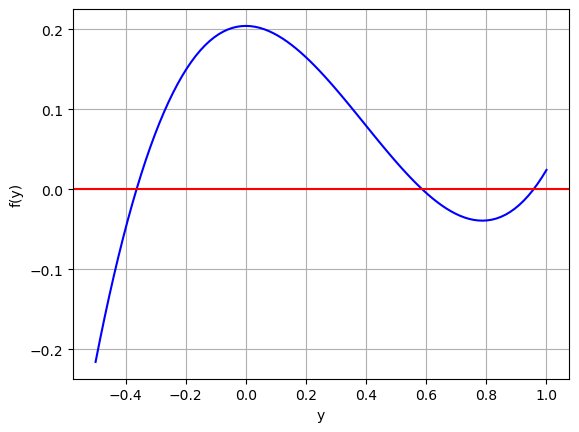

In [5]:
# Plot the function

def f_cubic(A, B, C, D, x):
    f_cubic = A * x * x * x + B * x * x + C * x + D
    return f_cubic

import numpy as np
from matplotlib import pyplot as plt

A = 1
B = -1.18
C = 0
D = 0.204

y_low = -0.5
y_high = 1.0
num_intervals = 100


y = np.linspace(y_low, y_high, num_intervals)

plt.plot(y, f_cubic(A, B, C, D, y), color='blue')
plt.grid()
plt.xlabel("y")
plt.ylabel("f(y)")
plt.axhline(0, color='red')
plt.show()

From the above python cell and chart we can see that the three roots are approximately -0.35, 0.58, 0.95.

We can use this information to help the secant solver below get more precice numerical answers

In [11]:
def SecantCubic(A , B , C , D, error , num , x0 , x1, debug):
    x2 = (x0 + x1) / 2
    
    step = 1
    Condition = True
    
    i = 0
    while Condition:
        f0 = f_cubic(A, B, C, D, x0)
        f1 = f_cubic(A, B, C, D, x1)

        if(debug > 0):
            print("SecantCubic: %d x0=%6.3f f0=%6.3f" %(i, x0, f0))
            print("SecantCubic: %d x1=%6.3f f1=%6.3f" %(i, x1, f1))

        if(f0 == f1):
            msg = "Divide by zero"
            print("%s" %(msg))
            break
            
        x2 = x0 - f0 * (x1 - x0) / (f1 - f0)
        f2 = f_cubic(A, B, C, D, x2)
        if(debug > 0):
            print("SecantCubic: %d x2=%6.3f f2=%6.3f" %(i, x2, f2))
        
        x0 = x1
        x1 = x2
        
        step = step + 1
        
        if step > num:
            msg = "not convergent"
            print("%s" %(msg))
            Condition = False
            
        if(abs(f2) < error):
            # SUCCESS
            Condition = False
        
        i = i + 1
        
    return x2


def GetHighestCubicDepth(A, B, C, D, error, x_low, x_high, num_intervals, debug):
    
    # steps from x_high to x_low to find first solution
    dx = (x_high - x_low) / num_intervals
    x0 = x_high
    
    root = -1

    num = 10
    
    for i in range(num_intervals):
        x1 = x0 - dx
        f0 = f_cubic(A, B, C, D, x0)
        f1 = f_cubic(A, B, C, D, x1)

        if(debug > 1):
            print("HighestCubicDepth: x0=%6.3f f0=%6.3f x2=%6.3f f1=%6.3f" %( x0, f0, x1, f1))
            
        if(f0 * f1 < 0):
            # solution between x0 and x1
            root = SecantCubic(A, B, C, D, error, num, x0, x1, debug)
            break

        x0 = x1
        
    return root

#------------------------------
# Here is the example problem
#------------------------------
A = 1
B = -1.18 
C = 0
D = 0.204

tolerance = 0.0001
max_iterations = 10
debug = 0

y1 = -0.4
y2 = 0
y2 = SecantCubic(A , B , C , D, tolerance , max_iterations , y1 , y2, debug)
print("Solution 1 is: y = %6.3f" % (y2))


y1 = 0.5
y2 = 0.7
y2 = SecantCubic(A , B , C , D, tolerance , max_iterations , y1 , y2, debug)
print("Solution 2 is: y = %6.3f" % (y2))


y1 = 1.0
y2 = 2
y2 = SecantCubic(A , B , C , D, tolerance , max_iterations , y1 , y2, debug)
print("Solution 3 is: y = %6.3f" % (y2))

y_low = 0
y_high = 2
num_intervals = 30

y2 = GetHighestCubicDepth(A,B,C,D,tolerance,y_low,y_high, num_intervals,debug)

print("The highest solution to this cubic is: y = %6.3f" % (y2))

Solution 1 is: y = -0.364
Solution 2 is: y =  0.586
Solution 3 is: y =  0.957
The highest solution to this cubic is: y =  0.957
